In [3]:
from PIL import Image
import numpy as np
from algorithme.admmp2 import ADMMP2

In [4]:
%load_ext autoreload
%autoreload 2

In [71]:
x = np.array(Image.open('../image/jerem.jfif').convert('L'))
xref = x
h = 1/16 * np.array([[1,2,1],
                     [2,4,2],
                     [1,2,1]])

h = np.ones((15,15))
h = h / np.linalg.norm(h)**2

In [72]:
x_max = np.max(x/255.)
lambd = 2e-10
mu = 2e-4
nu_min = 1
nu = 2**8 * lambd * nu_min/(mu*x_max)
nu = 0.5

In [73]:
algo = ADMMP2(x/255., h, lambd=lambd, mu=mu, nu=nu)

In [74]:
y = algo.gaussian_filter_2d()

In [83]:
Image.fromarray(np.uint8(y*255)).save("/home/heez/Documents/GitHub/Image_Restoration_SDI/image/jerem_flou.png")

In [77]:
X_, iter,tabError,tabTime, tabBSNR, tabLagran = algo.fit_transform(y, eps=10e-3, stop=400)

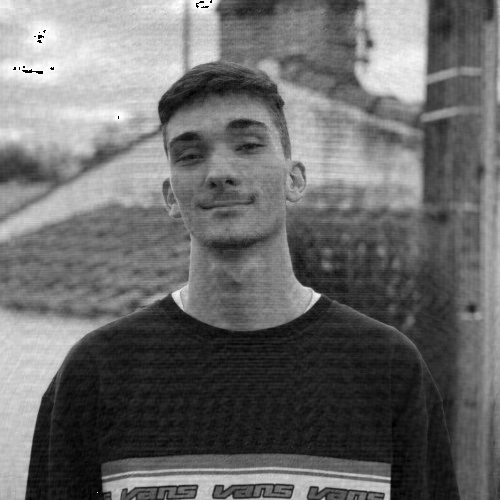

In [78]:
Image.fromarray(np.uint8(X_*255))

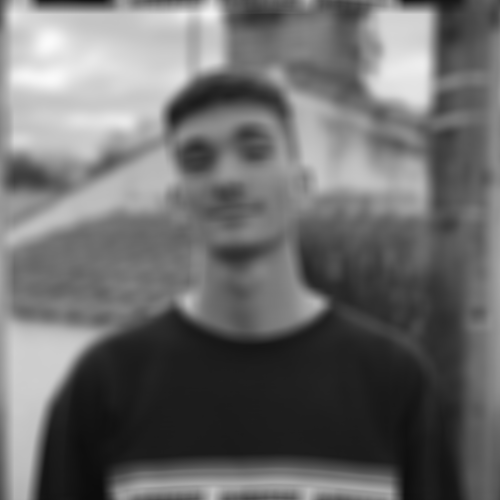

In [79]:
Image.fromarray(np.uint8(algo.rfft_dot(X_, algo.A_fft)*255))

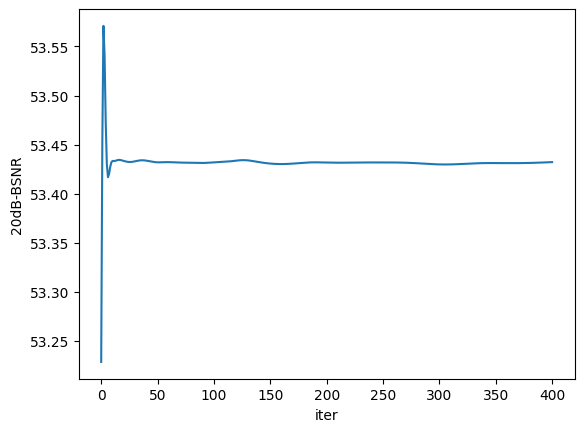

In [80]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, iter+1, 1), tabBSNR)
plt.xlabel('iter')
plt.ylabel('20dB-BSNR')
plt.show()

In [ ]:
algo.plot_convergence_iter

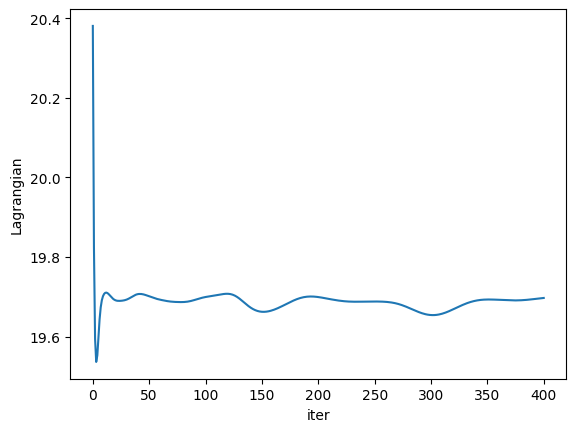

In [81]:
plt.plot(np.arange(0, iter+1, 1), tabLagran)
plt.xlabel('iter')
plt.ylabel('Lagrangian')
plt.show()

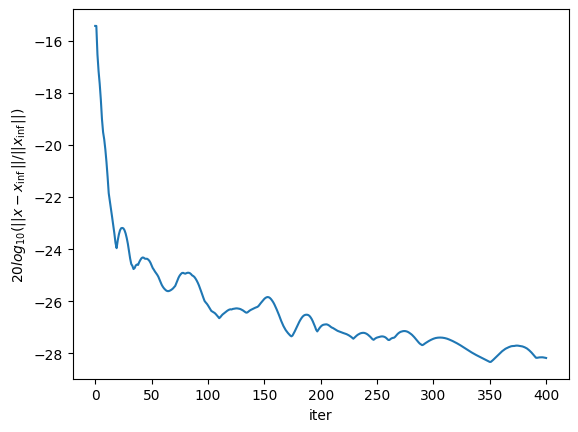

In [82]:
plt.plot(np.arange(0, iter+1, 1), 20*np.log10(tabError))
plt.xlabel('iter')
plt.ylabel('$20log_{10}(||x-x_{\inf}||/||x_{\inf}||)$')
plt.show()